In [1]:
#print(__doc__)

# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
#
# License: BSD 3 clause

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel


rng = np.random.RandomState(0)
X = rng.uniform(0, 5, 20)[:, np.newaxis]
y = 0.5 * np.sin(3 * X[:, 0]) + rng.normal(0, 0.5, X.shape[0])

import matplotlib as mpl
#mpl.style.use('seaborn')
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Times New Roman"


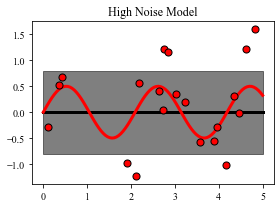

In [2]:
# First run
plt.figure(figsize=(4,3))
kernel = 1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
gp1 = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
X_ = np.linspace(0, 5, 100)
y_mean, y_cov = gp1.predict(X_[:, np.newaxis], return_cov=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
plt.plot(X_, 0.5*np.sin(3*X_), 'r', lw=3, zorder=9)
plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("High Noise Model") 
plt.tight_layout()
plt.savefig('high_noise',  bbox_inches = 'tight', pad_inches = 0, dpi=900)

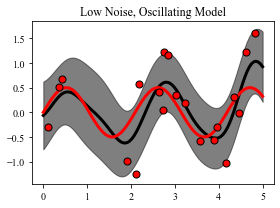

In [3]:

# Second run
plt.figure(figsize=(4,3))
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
gp2 = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
X_ = np.linspace(0, 5, 100)
y_mean, y_cov = gp2.predict(X_[:, np.newaxis], return_cov=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
plt.plot(X_, 0.5*np.sin(3*X_), 'r', lw=3, zorder=9)
plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title('Low Noise, Oscillating Model')
plt.tight_layout()
plt.savefig('osc',  bbox_inches = 'tight', pad_inches = 0, dpi=900)

In [4]:
# Plot LML landscape
theta0 = np.logspace(-2, 3, 49)
theta1 = np.logspace(-2, 0, 50)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp2.log_marginal_likelihood(np.log([0.36, Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T

vmin, vmax = (-LML).min(), (-LML).max()
vmax = 50
level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)

In [5]:
gp1.kernel_.theta

array([-11.51292546,   4.69457218,  -0.45065571])

In [6]:
res = np.append(gp1.kernel_.theta[1:].reshape(1,-1), gp2.kernel_.theta[1:].reshape(1,-1), 0)
res

array([[ 4.69457218, -0.45065571],
       [-1.00663819, -1.22409422]])

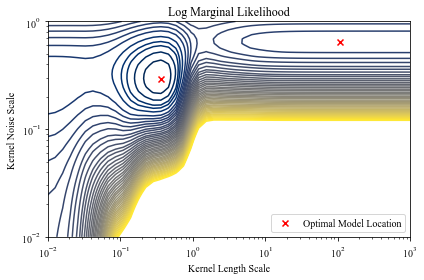

In [7]:
plt.figure(figsize=(6, 4))
plt.contour(Theta0, Theta1, -LML,
            levels=level, norm=LogNorm(vmin=vmin, vmax=vmax), cmap='cividis')
plt.scatter(np.exp(res[:,0]), np.exp(res[:,1]), marker='x', color='red', label='Optimal Model Location')
plt.legend(loc=4)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Kernel Length Scale")
plt.ylabel("Kernel Noise Scale")
plt.title("Log Marginal Likelihood")
plt.tight_layout()
plt.savefig('lml',  bbox_inches = 'tight', pad_inches = 0, dpi=900)